In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors)

In [2]:
data = pd.read_csv("_All_Cities_Cleaned.csv")
data.head(10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad
5,OWNER,1.0,BHK,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1.0,Ahmedabad
6,OWNER,1.0,RK,Studio Apartment,Jivraj Park,6000.0,180.0,Semi-Furnished,1.0,Ahmedabad
7,OWNER,2.0,BHK,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2.0,Ahmedabad
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad
9,OWNER,4.0,BHK,Independent House,Maninagar,38500.0,3500.0,Furnished,4.0,Ahmedabad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,193011.0,2.081679,0.956901,1.0,1.0,2.0,3.0,15.0
price,193011.0,44336.537306,91951.990334,1200.0,13000.0,21000.0,36000.0,5885000.0
area,193011.0,1264.604468,1043.725561,3.0,650.0,1000.0,1440.0,19800.0
bathroom,193011.0,2.059883,0.934805,1.0,1.0,2.0,3.0,19.0


In [5]:
city_counts = data["city"].value_counts().sort_values()
city_counts

Chennai       8658
Kolkata       9664
Hyderabad    10544
Ahmedabad    18453
Pune         22596
Bangalore    23072
Delhi        32608
Mumbai       67416
Name: city, dtype: int64

In [6]:
data.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
city             0
dtype: int64

In [7]:
skew = []
kurt = []
num_cols = data.select_dtypes(exclude = ['object']).columns
for col in num_cols:
    skew.append(data[col].skew().round(1))
    kurt.append(data[col].kurt().round(1))

stats = pd.DataFrame({'skew':skew,'kurt':kurt}, index = num_cols)
stats

,skew,kurt
bedroom,1.3,7.2
price,10.2,269.4
area,3.5,18.8
bathroom,1.5,8.6


In [8]:
data.corr().price

bedroom     0.526540
price       1.000000
area        0.756773
bathroom    0.534605
Name: price, dtype: float64

<AxesSubplot:>

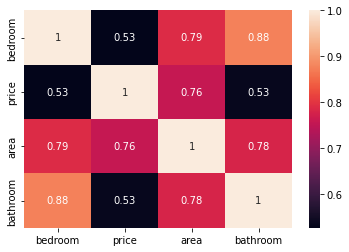

In [9]:
sns.heatmap(data.corr(),annot=True)

C:\Users\ABDULB~1\AppData\Local\Temp/ipykernel_7840/1367329792.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1=round(data[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))


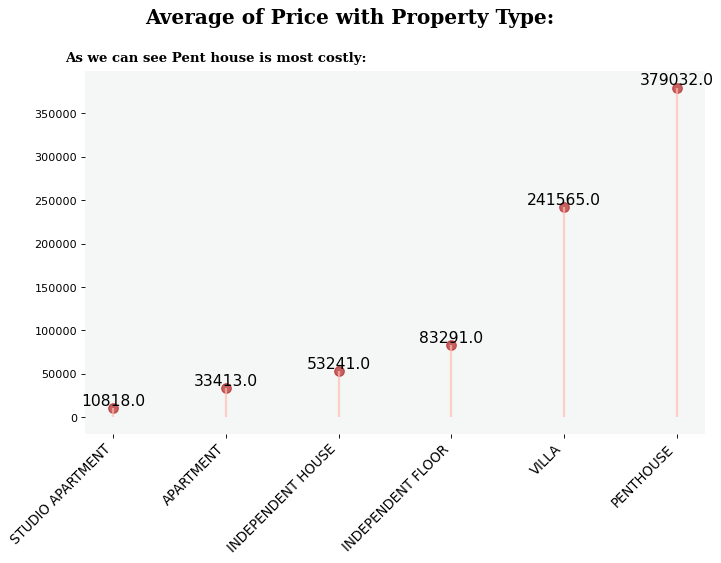

In [10]:
data1=round(data[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))
data1.sort_values('price',inplace=True)
data1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=data1.index,ymin=0,ymax=data1.price,color = colors[3],alpha=0.7,linewidth=2)
ax.scatter(x=data1.index, y=data1.price, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Average of Property Type With Price', fontdict={'size':22})

ax.set_xticks(data1.index)
ax.set_xticklabels(data1.property_type.str.upper(), rotation=45, fontdict={'horizontalalignment': 'right', 'size':12})

ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
for row in data1.itertuples():
    ax.text(row.Index, row.price+.5, s=round(row.price, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

fig.text(0.2,0.98,"Average of Price with Property Type:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"As we can see Pent house is most costly:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)

plt.show()

C:\Users\Abdul Basith R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AGENT      152951
OWNER       38714
BUILDER      1346
Name: seller_type, dtype: int64


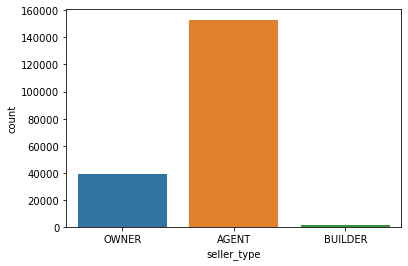

In [11]:
sns.countplot(data["seller_type"])
print(data["seller_type"].value_counts())

C:\Users\Abdul Basith R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


BHK    183748
RK       9263
Name: layout_type, dtype: int64


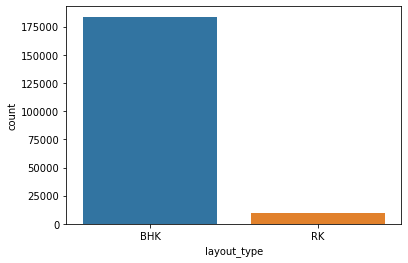

In [12]:
sns.countplot(data["layout_type"])
print(data["layout_type"].value_counts())

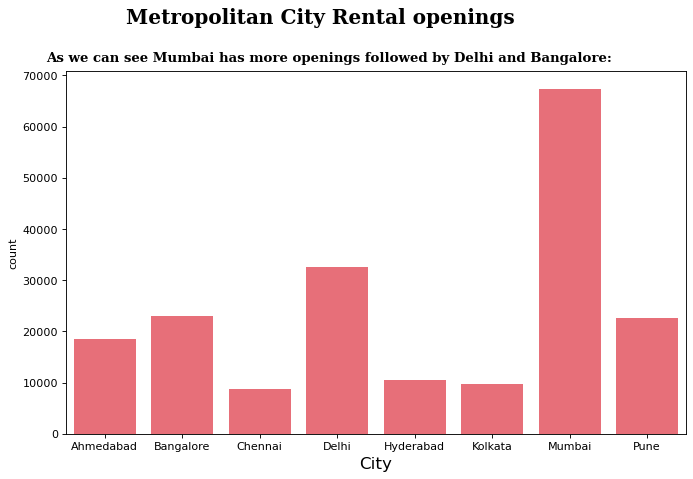

In [13]:
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax = sns.countplot(x="city",data=data,color=colors[0])
plt.xlabel("City",fontsize=15)

fig.text(0.2,0.98,"Metropolitan City Rental openings",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"As we can see Mumbai has more openings followed by Delhi and Bangalore:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)
plt.show()

C:\Users\ABDULB~1\AppData\Local\Temp/ipykernel_7840/1733302509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1=round(data[['price', 'city']].groupby('city').apply(lambda x: x.mean()))


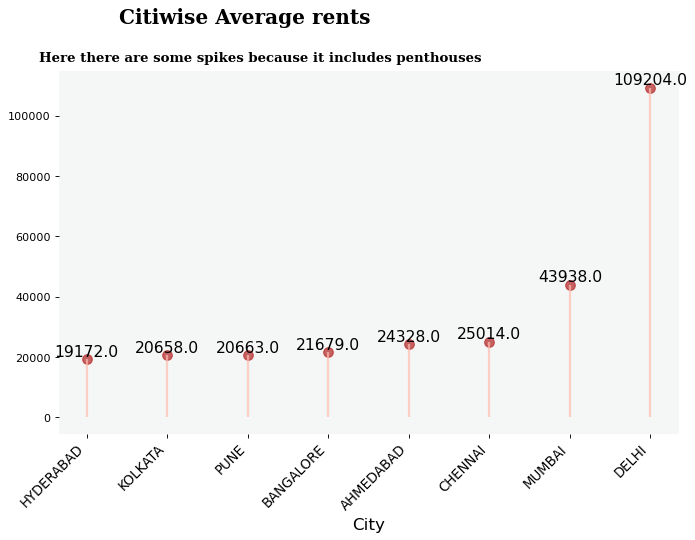

In [14]:
data1=round(data[['price', 'city']].groupby('city').apply(lambda x: x.mean()))
data1.sort_values('price',inplace=True)
data1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=data1.index,ymin=0,ymax=data1.price,color = colors[3],alpha=0.7,linewidth=2)
ax.scatter(x=data1.index, y=data1.price, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Average of Property Type With Price', fontdict={'size':22})

ax.set_xticks(data1.index)
ax.set_xticklabels(data1.city.str.upper(), rotation=45, fontdict={'horizontalalignment': 'right', 'size':12})

ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
for row in data1.itertuples():
    ax.text(row.Index, row.price+.5, s=round(row.price, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.xlabel("City",fontsize=15)

fig.text(0.2,0.98,"Citiwise Average rents",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"Here there are some spikes because it includes penthouses",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)
plt.show()

In [15]:
property_count = pd.DataFrame(data["property_type"].value_counts().sort_values())
property_count

,property_type
Penthouse,156
Villa,3115
Studio Apartment,9263
Independent House,12838
Independent Floor,27283
Apartment,140356


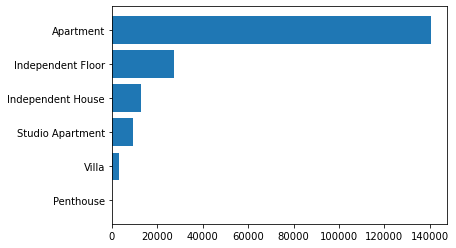

In [16]:
plt.barh(property_count.index,property_count["property_type"])

fig.text(0.2,0.98,"Property Type and",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"As we can see Mumbai has more openings followed by Delhi and Bangalore:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)
plt.show()

In [17]:
apartment_data = data.loc[data["property_type"] == "Apartment"]

In [18]:
apartment_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,140356.0,2.048035,0.827023,1.0,1.0,2.0,3.0,15.0
price,140356.0,33412.887429,43378.778571,1500.0,14500.0,22000.0,35000.0,1600000.0
area,140356.0,1141.284655,604.951046,100.0,700.0,1040.0,1350.0,12000.0
bathroom,140356.0,2.052759,0.786641,1.0,2.0,2.0,2.0,18.0


In [19]:
bins = [0,500,1000,1500,2000,2500,3000,3500,4000]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '>3500']
apartment_data['area_range'] = pd.cut(apartment_data["area"], bins, labels = labels,include_lowest = True)
apartment_data

C:\Users\ABDULB~1\AppData\Local\Temp/ipykernel_7840/1220320615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_data['area_range'] = pd.cut(apartment_data["area"], bins, labels = labels,include_lowest = True)


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,area_range
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,1000-1500
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,1500-2000
5,OWNER,1.0,BHK,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1.0,Ahmedabad,500-1000
7,OWNER,2.0,BHK,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2.0,Ahmedabad,1000-1500
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad,1000-1500
...,...,...,...,...,...,...,...,...,...,...,...
193004,OWNER,1.0,BHK,Apartment,Kothrud,15500.0,500.0,Semi-Furnished,1.0,Pune,<500
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,Pune,500-1000
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,Pune,<500
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,Pune,500-1000


<AxesSubplot:xlabel='area_range', ylabel='count'>

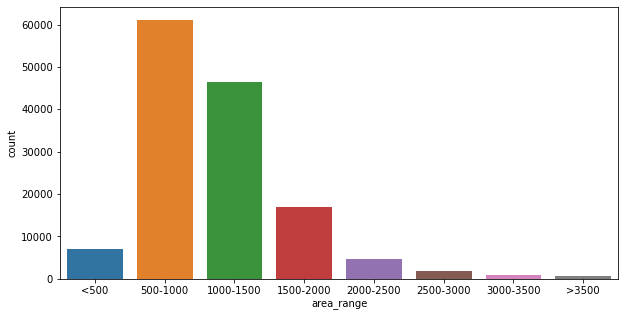

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=apartment_data,x="area_range")

In [21]:
bins = [i for i in range(0,10001,500)]
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000','4000-4500','4500-5000','5000-5500','5500-6000','6000-6500','6500-7000','7000-7500','7500-8000','8000-8500','8500=9000','9000-9500','>9500']
data['area_range'] = pd.cut(data["area"], bins, labels = labels,include_lowest = True)
data

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,area_range
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,1000-1500
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,<500
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,1500-2000
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,1000-1500
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,1500-2000
...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,Pune,500-1000
193007,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,7000.0,350.0,Unfurnished,1.0,Pune,<500
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,Pune,<500
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,Pune,500-1000


<AxesSubplot:xlabel='area_range', ylabel='count'>

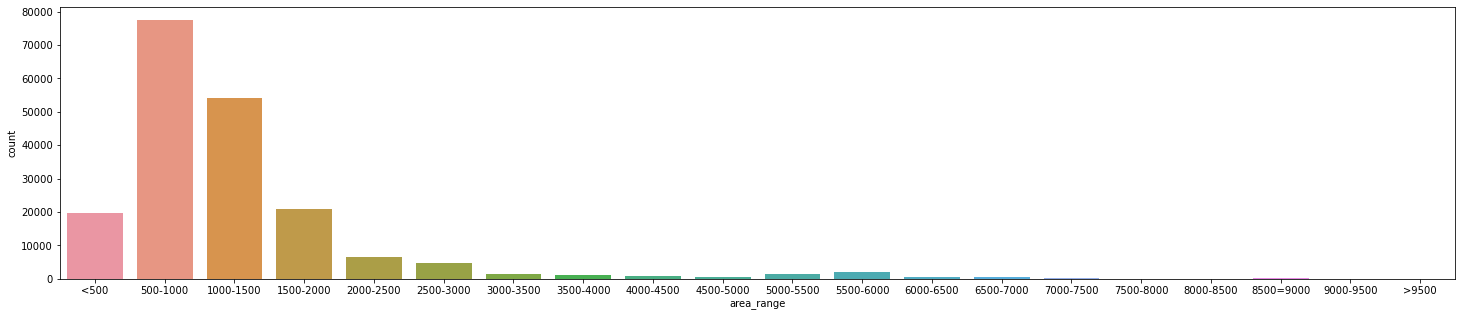

In [22]:
plt.figure(figsize=(25,5))
sns.countplot(data=data,x="area_range")

In [23]:
bins = [i for i in range(0,55001,5000)]
labels = ['>5000','5000-10000','10000-15000','15000-20000', '20000-25000', '25000-30000', '30000-35000', '35000-40000', '40000-45000', '45000-50000', '>50000']
data['price_range'] = pd.cut(data["price"], bins, labels = labels,include_lowest = True)
data

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,area_range,price_range
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,1000-1500,15000-20000
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,<500,5000-10000
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,1500-2000,20000-25000
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,1000-1500,10000-15000
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,1500-2000,15000-20000
...,...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,Pune,500-1000,10000-15000
193007,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,7000.0,350.0,Unfurnished,1.0,Pune,<500,5000-10000
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,Pune,<500,5000-10000
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,Pune,500-1000,15000-20000


<AxesSubplot:xlabel='price_range', ylabel='count'>

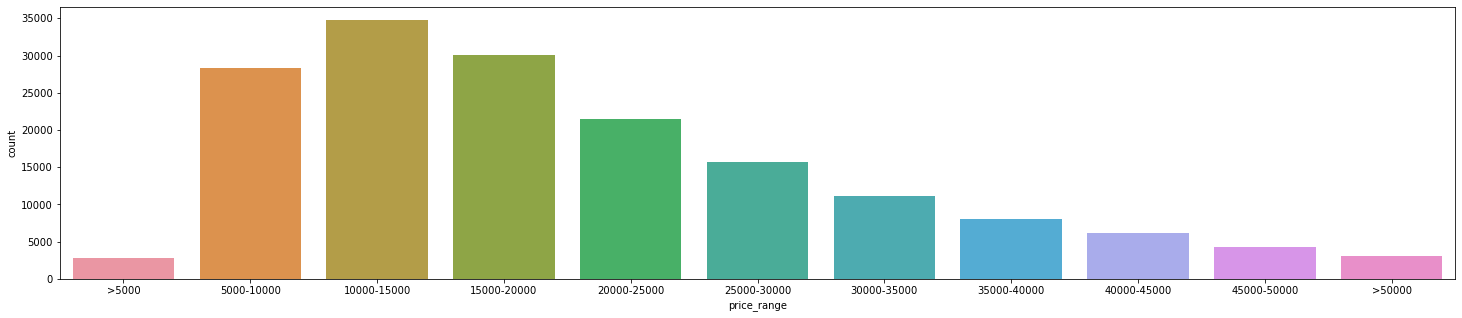

In [24]:
plt.figure(figsize=(25,5))
sns.countplot(data=data,x="price_range")

In [25]:
temp = pd.DataFrame(data[["property_type","price_range"]].value_counts(),columns=['numbers'])

<AxesSubplot:xlabel='property_type'>

<Figure size 720x576 with 0 Axes>

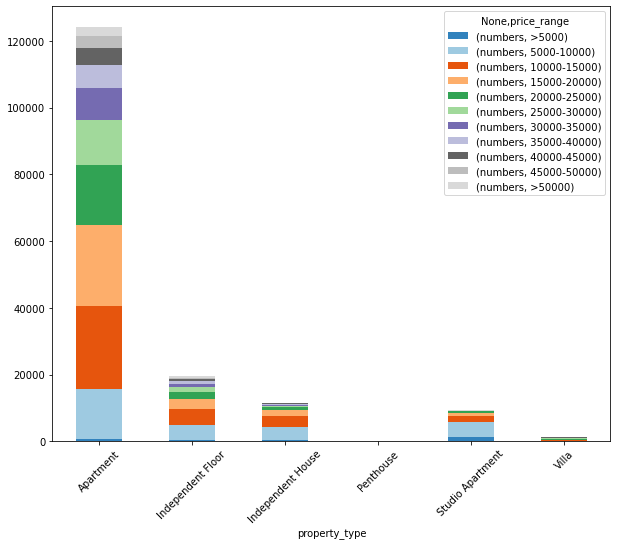

In [26]:
plt.figure(figsize=(10,8))
temp.unstack().plot(kind='bar',stacked=True,figsize=(10,8),colormap="tab20c",rot=45)

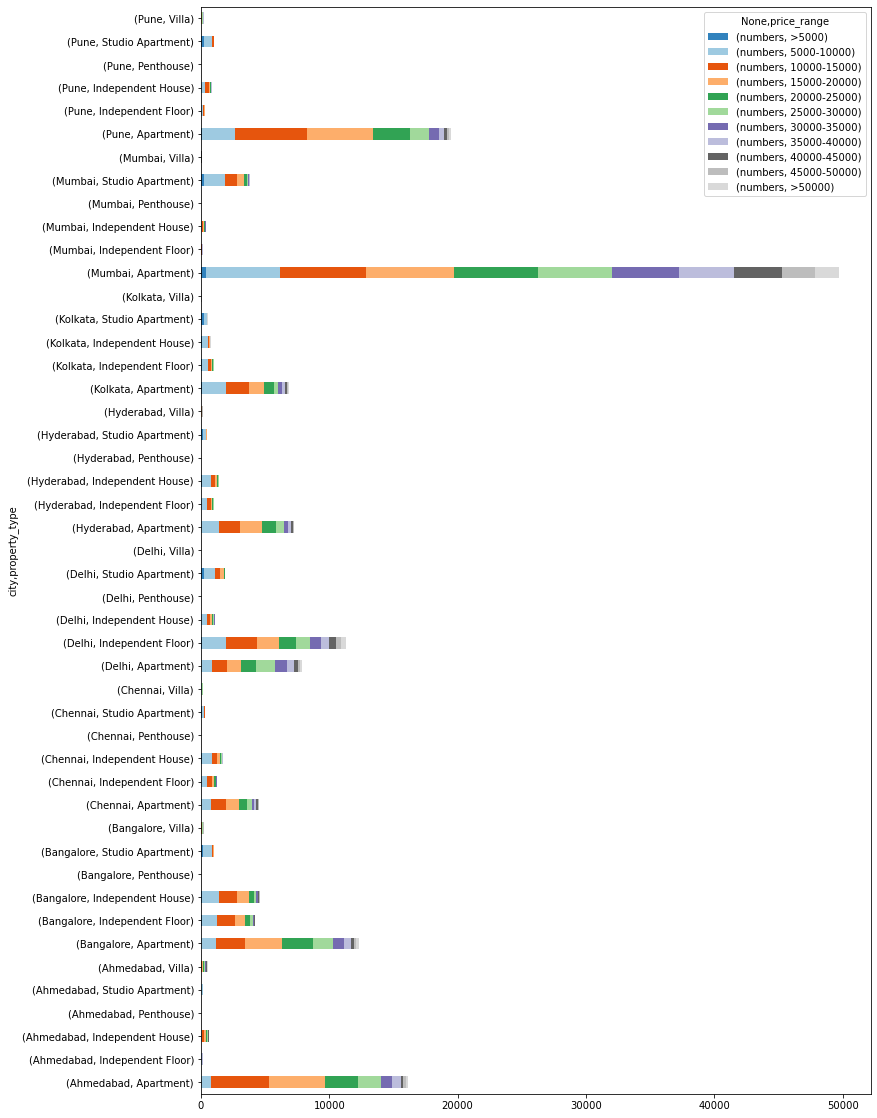

In [27]:
temp1 = pd.DataFrame(data[["city","property_type","price_range"]].value_counts(),columns=['numbers'])
temp1.unstack().plot(kind='barh',stacked=True,figsize=(12,20),colormap="tab20c")
plt.savefig("CITY PROPERTY PRICE")

<AxesSubplot:xlabel='property_type'>

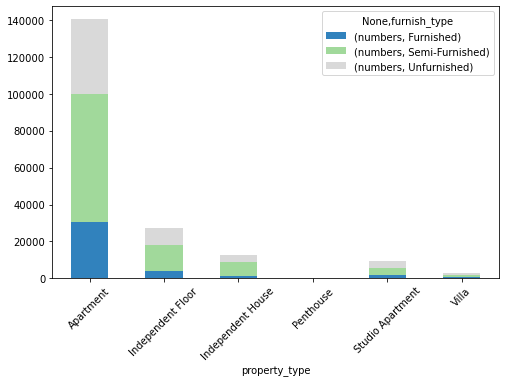

In [28]:
temp2 = pd.DataFrame(data[["property_type","furnish_type"]].value_counts(),columns=['numbers'])
temp2.unstack().plot(kind='bar',stacked=True,figsize=(8,5),colormap='tab20c',rot=45)

<AxesSubplot:xlabel='city'>

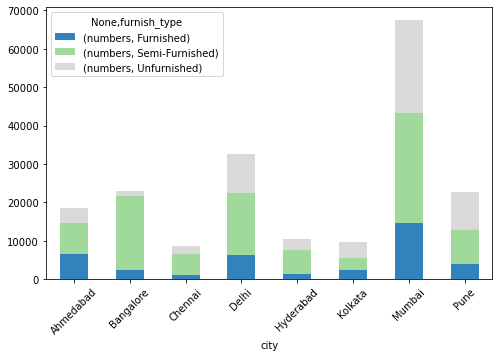

In [29]:
temp3 = pd.DataFrame(data[["city","furnish_type"]].value_counts(),columns=['numbers'])
temp3.unstack().plot(kind='bar',stacked=True,figsize=(8,5),colormap='tab20c',rot=45)

In [30]:
data["seller_type"]=data["seller_type"].map({'OWNER':0,'AGENT':1,'BUILDER':2})
data["layout_type"]=data["layout_type"].map({'BHK':0,'RK':1})
data["property_type"]=data["property_type"].map({'Apartment':0,'Studio Apartment':1,'Independent House':2,'Independent Floor':3,'Villa':4,'Penthouse':5})
data["furnish_type"]=data["furnish_type"].map({'Furnished':0,'Semi-Furnished':1,'Unfurnished':2})
data["city"]=data["city"].map({'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6,'Pune':7})

data.corr().price.sort_values()

layout_type     -0.081844
city            -0.015042
furnish_type     0.078140
seller_type      0.138533
property_type    0.276325
bedroom          0.526540
bathroom         0.534605
area             0.756773
price            1.000000
Name: price, dtype: float64

In [31]:
data3 = data.drop_duplicates()
data3 = data3.reset_index()

In [32]:
data3

,index,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,area_range,price_range
0,0,0,2.0,0,0,Bodakdev,20000.0,1450.0,0,2.0,0,1000-1500,15000-20000
1,1,0,1.0,1,1,CG Road,7350.0,210.0,1,1.0,0,<500,5000-10000
2,2,0,3.0,0,0,Jodhpur,22000.0,1900.0,2,3.0,0,1500-2000,20000-25000
3,3,0,2.0,0,2,Sanand,13000.0,1285.0,1,2.0,0,1000-1500,10000-15000
4,4,0,2.0,0,2,Navrangpura,18000.0,1600.0,0,2.0,0,1500-2000,15000-20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107608,193006,0,1.0,0,0,Chinchwad,13250.0,650.0,1,1.0,7,500-1000,10000-15000
107609,193007,0,1.0,1,1,Wadgaon Sheri,7000.0,350.0,2,1.0,7,<500,5000-10000
107610,193008,0,1.0,0,0,Kothrud,8500.0,389.0,1,1.0,7,<500,5000-10000
107611,193009,1,1.0,0,0,Wakad,16500.0,670.0,1,2.0,7,500-1000,15000-20000


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
features = ["price","area"]

data3[["price_scaled","area_scaled"]] = scaler.fit_transform(data3[features])
data3

,index,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,area_range,price_range,price_scaled,area_scaled
0,0,0,2.0,0,0,Bodakdev,20000.0,1450.0,0,2.0,0,1000-1500,15000-20000,-0.262012,0.138524
1,1,0,1.0,1,1,CG Road,7350.0,210.0,1,1.0,0,<500,5000-10000,-0.384487,-0.972884
2,2,0,3.0,0,0,Jodhpur,22000.0,1900.0,2,3.0,0,1500-2000,20000-25000,-0.242648,0.541858
3,3,0,2.0,0,2,Sanand,13000.0,1285.0,1,2.0,0,1000-1500,10000-15000,-0.329784,-0.009365
4,4,0,2.0,0,2,Navrangpura,18000.0,1600.0,0,2.0,0,1500-2000,15000-20000,-0.281375,0.272969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107608,193006,0,1.0,0,0,Chinchwad,13250.0,650.0,1,1.0,7,500-1000,10000-15000,-0.327364,-0.578513
107609,193007,0,1.0,1,1,Wadgaon Sheri,7000.0,350.0,2,1.0,7,<500,5000-10000,-0.387875,-0.847402
107610,193008,0,1.0,0,0,Kothrud,8500.0,389.0,1,1.0,7,<500,5000-10000,-0.373353,-0.812447
107611,193009,1,1.0,0,0,Wakad,16500.0,670.0,1,2.0,7,500-1000,15000-20000,-0.295898,-0.560587


In [36]:
data3 = data3.drop(features,axis=1)

In [37]:
data3 = data3.drop(["index","area_range","price_range"],axis=1)

In [38]:
data3 = data3.drop("locality",axis=1)

In [39]:
from sklearn.cluster import KMeans
data

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,area_range,price_range
0,0,2.0,0,0,Bodakdev,20000.0,1450.0,0,2.0,0,1000-1500,15000-20000
1,0,1.0,1,1,CG Road,7350.0,210.0,1,1.0,0,<500,5000-10000
2,0,3.0,0,0,Jodhpur,22000.0,1900.0,2,3.0,0,1500-2000,20000-25000
3,0,2.0,0,2,Sanand,13000.0,1285.0,1,2.0,0,1000-1500,10000-15000
4,0,2.0,0,2,Navrangpura,18000.0,1600.0,0,2.0,0,1500-2000,15000-20000
...,...,...,...,...,...,...,...,...,...,...,...,...
193006,0,1.0,0,0,Chinchwad,13250.0,650.0,1,1.0,7,500-1000,10000-15000
193007,0,1.0,1,1,Wadgaon Sheri,7000.0,350.0,2,1.0,7,<500,5000-10000
193008,0,1.0,0,0,Kothrud,8500.0,389.0,1,1.0,7,<500,5000-10000
193009,1,1.0,0,0,Wakad,16500.0,670.0,1,2.0,7,500-1000,15000-20000


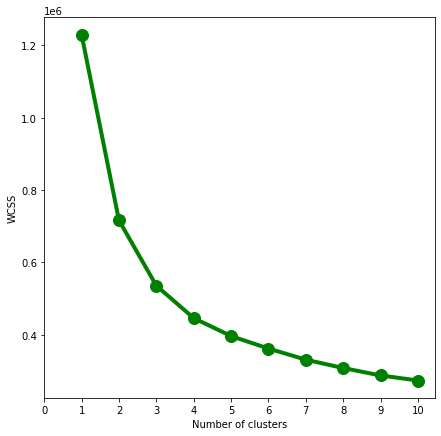

In [40]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(data3)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

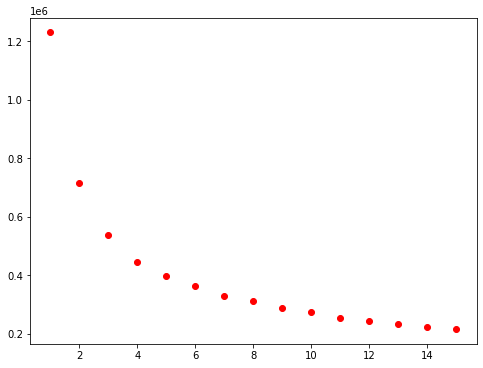

The best K suggest:  5


In [41]:
from sklearn.cluster import KMeans
wcss = [] 
cl=15
corte = 0.1
anterior = 100000000000000
cost = []
K_best = cl

for k in range(1,cl+1):
    model = KMeans(n_clusters=k, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=10)
    model=model.fit(data3)
    labels=model.labels_
    interia=model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte):
        K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range(1, cl+1), cost, c='red')
plt.show()

print('The best K suggest: ', K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,
               max_iter=300, tol=1e-04, random_state=101)

model = model.fit(data3)
labels = model.labels_

In [42]:
import plotly as py
import plotly.graph_objs as go

def calcKMean(i,X3):
  algorithm = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
  algorithm.fit(X3)
  labels3 = algorithm.labels_
  centroids3 = algorithm.cluster_centers_
  return labels3

def plot3d(data, titles, labels3):
  data['label3'] =  labels3
  trace1 = go.Scatter3d(
      x= data[titles[0]],
      y= data[titles[1]],
      z= data[titles[2]],
      mode='markers',
      marker=dict(
          color = data['label3'], 
          size= 5,
          line=dict(
              color= data['label3'],
              width= 12
          ),
          opacity=0.8
      )
  )
  data = [trace1]
  layout = go.Layout(
  #     margin=dict(
  #         l=0,
  #         r=0,
  #         b=0,
  #         t=0
  #     )
      title= 'Clusters',
      scene = dict(
              xaxis = dict(title  = titles[0]),
              yaxis = dict(title  = titles[1]),
              zaxis = dict(title  = titles[2])
          )
  )
  fig = go.Figure(data=data, layout=layout)
  py.offline.iplot(fig)

In [43]:
clustering_kmeans = KMeans(n_clusters=5, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=10)
data3['clusters'] = clustering_kmeans.fit_predict(data3) 


d1 = data3[data3.clusters==1]
d0 = data3[data3.clusters==0]
d2 = data3[data3.clusters==2]
d3 = data3[data3.clusters==3]
d4 = data3[data3.clusters==4]
data3

,seller_type,bedroom,layout_type,property_type,furnish_type,bathroom,city,price_scaled,area_scaled,clusters
0,0,2.0,0,0,0,2.0,0,-0.262012,0.138524,1
1,0,1.0,1,1,1,1.0,0,-0.384487,-0.972884,1
2,0,3.0,0,0,2,3.0,0,-0.242648,0.541858,1
3,0,2.0,0,2,1,2.0,0,-0.329784,-0.009365,1
4,0,2.0,0,2,0,2.0,0,-0.281375,0.272969,1
...,...,...,...,...,...,...,...,...,...,...
107608,0,1.0,0,0,1,1.0,7,-0.327364,-0.578513,4
107609,0,1.0,1,1,2,1.0,7,-0.387875,-0.847402,4
107610,0,1.0,0,0,1,1.0,7,-0.373353,-0.812447,4
107611,1,1.0,0,0,1,2.0,7,-0.295898,-0.560587,4


Text(0, 0.5, 'price_scaled')

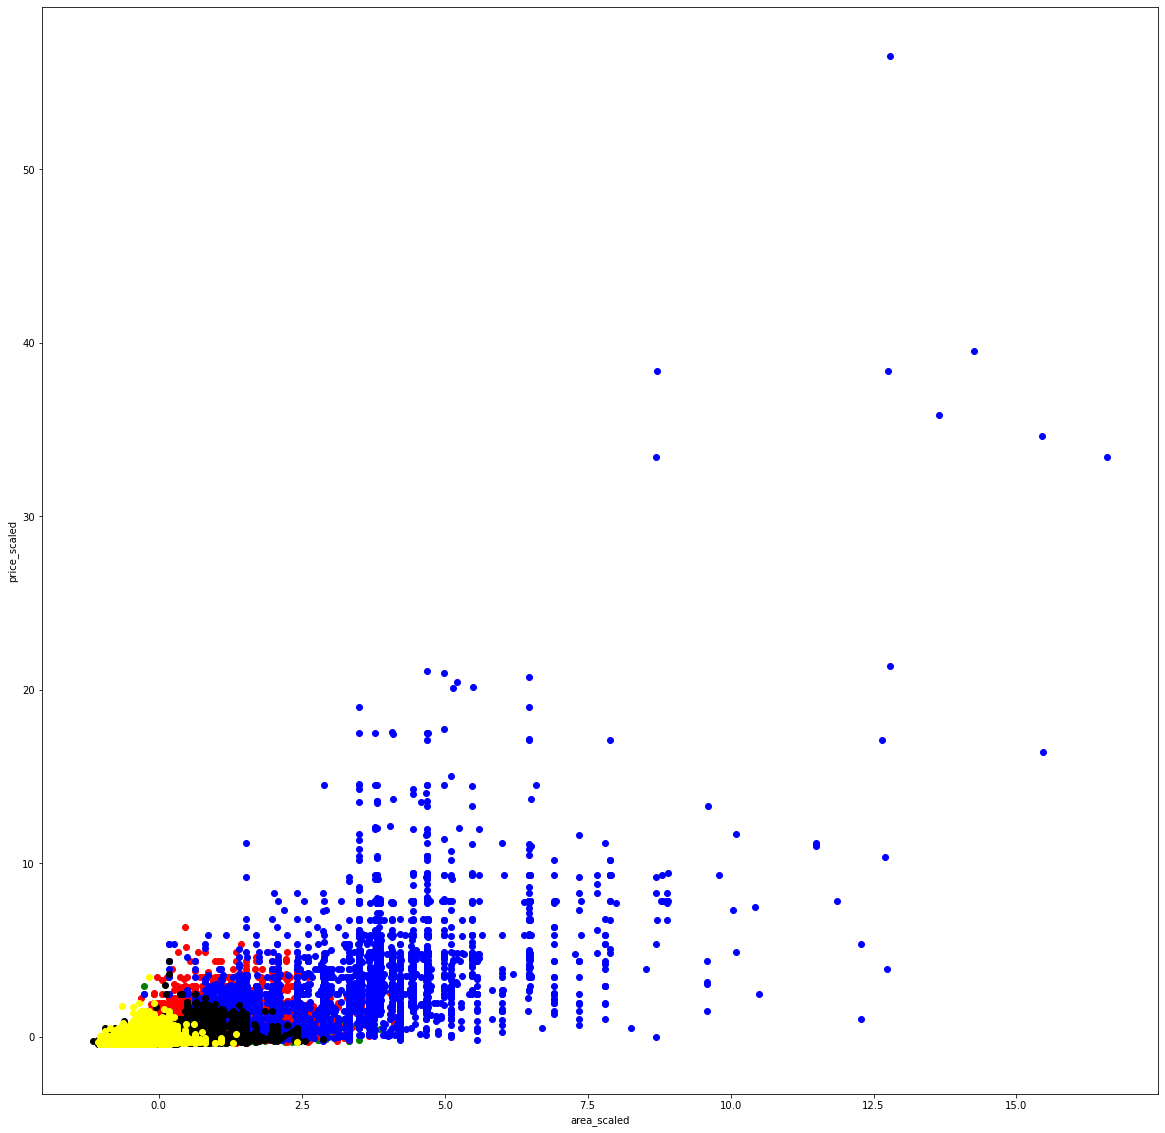

In [44]:
plt.figure(figsize=(20,20))
plt.scatter(d1.area_scaled, d1['price_scaled'],color='green')
plt.scatter(d0.area_scaled, d0['price_scaled'],color='red')
plt.scatter(d2.area_scaled, d2['price_scaled'],color='blue')
plt.scatter(d3.area_scaled, d3['price_scaled'],color='black')
plt.scatter(d4.area_scaled, d4['price_scaled'],color='yellow')

plt.xlabel('area_scaled')
plt.ylabel('price_scaled')

Text(0, 0.5, 'city')

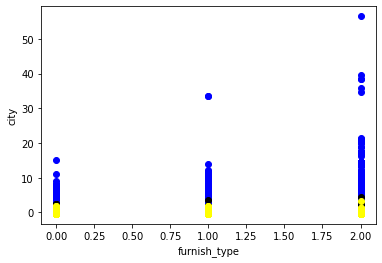

In [45]:
# plt.figure(figsize=(20,20))
plt.scatter(d1.furnish_type, d1['price_scaled'],color='green')
plt.scatter(d0.furnish_type, d0['price_scaled'],color='red')
plt.scatter(d2.furnish_type, d2['price_scaled'],color='blue')
plt.scatter(d3.furnish_type, d3['price_scaled'],color='black')
plt.scatter(d4.furnish_type, d4['price_scaled'],color='yellow')

plt.xlabel('furnish_type')
plt.ylabel('city')

Text(0, 0.5, 'city')

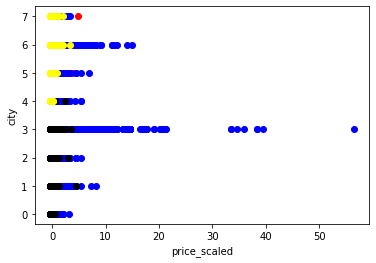

In [46]:
# plt.figure(figsize=(20,20))
plt.scatter(d1.price_scaled, d1['city'],color='green')
plt.scatter(d0.price_scaled, d0['city'],color='red')
plt.scatter(d2.price_scaled, d2['city'],color='blue')
plt.scatter(d3.price_scaled, d3['city'],color='black')
plt.scatter(d4.price_scaled, d4['city'],color='yellow')

plt.xlabel('price_scaled')
plt.ylabel('city')

In [47]:
def plotseg(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')
  plt.scatter(clus[Y==3,0], clus[Y==3,1], s=10, c='green', label='Cluster 4')
  plt.scatter(clus[Y==4,0], clus[Y==4,1], s=10, c='yellow', label='Cluster 5')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

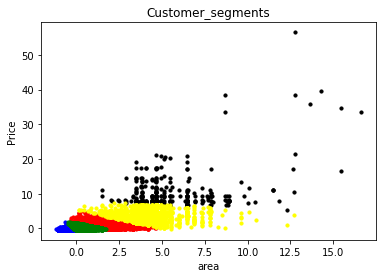

In [48]:
clus = data3.loc[:,["area_scaled","price_scaled"]].values
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["area","Price"])

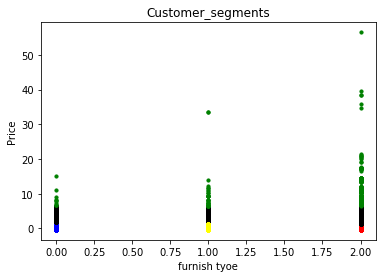

In [49]:
clus = data3.loc[:,["furnish_type","price_scaled"]].values
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["furnish tyoe","Price"])

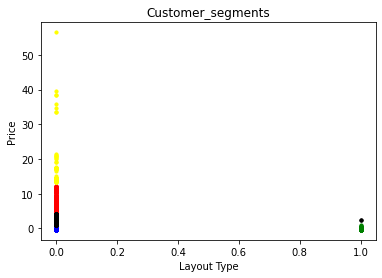

In [50]:
clus = data3.loc[:,["layout_type","price_scaled"]].values
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Layout Type","Price"])

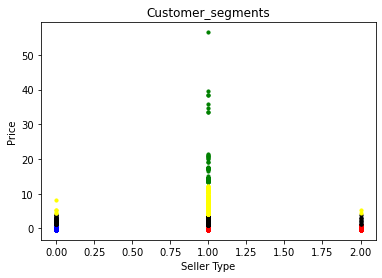

In [51]:
clus = data3.loc[:,["seller_type","price_scaled"]].values
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Seller Type","Price"])

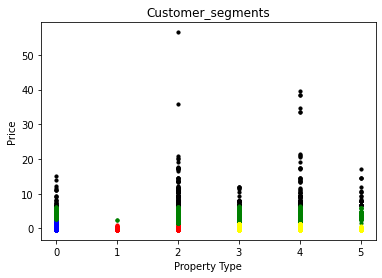

In [52]:
clus = data3.loc[:,["property_type","price_scaled"]].values
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Property Type","Price"])

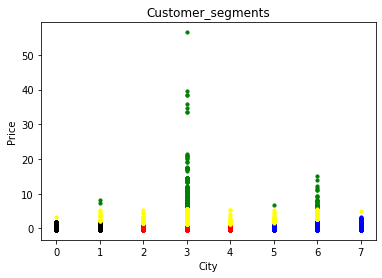

In [53]:
clus = data3.loc[:,["city","price_scaled"]].values
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["City","Price"])

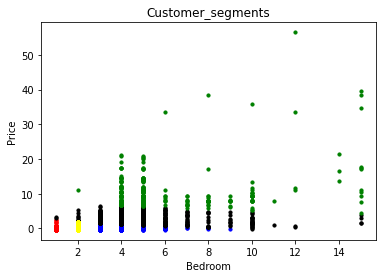

In [54]:
clus = data3.loc[:,["bedroom","price_scaled"]].values
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Bedroom","Price"])

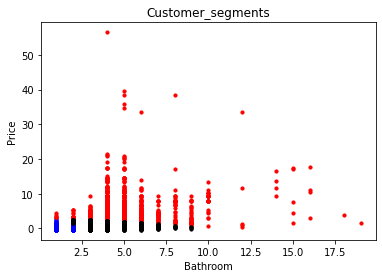

In [55]:
clus = data3.loc[:,["bathroom","price_scaled"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Bathroom","Price"])

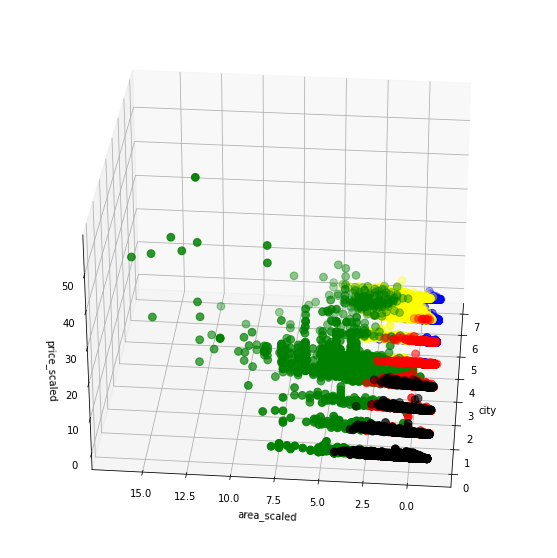

In [56]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3.city[labels == 0], data3["area_scaled"][labels == 0], data3["price_scaled"][labels == 0],  c='blue', s=60)
ax.scatter(data3.city[labels == 1], data3["area_scaled"][labels == 1], data3["price_scaled"][labels == 1],  c='red', s=60)
ax.scatter(data3.city[labels == 2], data3["area_scaled"][labels == 2], data3["price_scaled"][labels == 2],  c='green', s=60)
ax.scatter(data3.city[labels == 3], data3["area_scaled"][labels == 3], data3["price_scaled"][labels == 3],  c='black', s=60)
ax.scatter(data3.city[labels == 4], data3["area_scaled"][labels == 4], data3["price_scaled"][labels == 4],  c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("city")
plt.ylabel("area_scaled")
ax.set_zlabel('price_scaled')
plt.show()

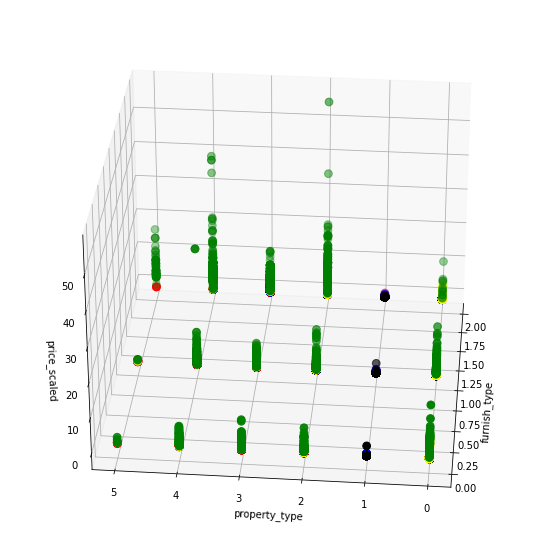

In [57]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3.furnish_type[labels == 0], data3["property_type"][labels == 0], data3["price_scaled"][labels == 0],  c='blue', s=60)
ax.scatter(data3.furnish_type[labels == 1], data3["property_type"][labels == 1], data3["price_scaled"][labels == 1],  c='red', s=60)
ax.scatter(data3.furnish_type[labels == 2], data3["property_type"][labels == 2], data3["price_scaled"][labels == 2],  c='green', s=60)
ax.scatter(data3.furnish_type[labels == 3], data3["property_type"][labels == 3], data3["price_scaled"][labels == 3],  c='black', s=60)
ax.scatter(data3.furnish_type[labels == 4], data3["property_type"][labels == 4], data3["price_scaled"][labels == 4],  c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("furnish_type")
plt.ylabel("property_type")
ax.set_zlabel('price_scaled')
plt.show()